In [2]:
# Cheminformatics Demo - An Error will occur but can still continue :)

!pip install -q global-chem[cheminformatics] --upgrade
!rm -rf global-chem/
!git clone https://github.com/Sulstice/global-chem

Cloning into 'global-chem'...
remote: Enumerating objects: 3697, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 3697 (delta 17), reused 17 (delta 6), pack-reused 3658
Receiving objects: 100% (3697/3697), 47.24 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (2209/2209), done.


In [5]:
from global_chem import GlobalChem
from global_chem_extensions import GlobalChemExtensions

gc = GlobalChem()
cheminformatics = GlobalChemExtensions().cheminformatics()

In [20]:
# Validate your SMILES against different platforms

gc.build_global_chem_network()
smiles_list = list(gc.get_node_smiles('emerging_perfluoroalkyls').values())

sucesses, failures = cheminformatics.verify_smiles(
    smiles_list,
    rdkit=True, 
    partial_smiles=True,
    return_failures=True,
    pysmiles=True,
    molvs=True
)

total = len(sucesses) + len(failures)
print ("Percantage of Accepted SMILES: %s" % ((len(sucesses) / total) * 100))

Percantage of Accepted SMILES: 93.85474860335195


In [9]:
# Filter SMILES By Filter

gc.build_global_chem_network()
smiles_list = list(gc.get_node_smiles('emerging_perfluoroalkyls').values())

filtered_smiles = cheminformatics.filter_smiles_by_criteria(
    smiles_list,
    lipinski_rule_of_5=True,
    ghose=False,
    veber=False,
    rule_of_3=False,
    reos=False,
    drug_like=False,
    pass_all_filters=False
)

print (filtered_smiles)

['O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC(F)(F)C1(F)OC1(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F']


In [12]:
# SMILES to PDF and Back Again

smiles_list = list(gc.get_node_smiles('pihkal').values())

cheminformatics.smiles_to_pdf(
    smiles=smiles_list,
    labels = [],
    file_name = 'molecules.pdf',
    include_failed_smiles = True,
    title = 'MY MOLECULES',
)

molecules = cheminformatics.pdf_to_smiles(
    'molecules.pdf',
)

print (len(molecules))

Method: 'generate' Time: 4.98 seconds
179


In [16]:
# Convert to Amino Acid Sequence to SMILES and Back Again

amino_acid_test = 'RSTEFGHIKLADPQ'
smiles = cheminformatics.amino_acids_to_smiles(amino_acid_test)
print ("SMILES: %s " % smiles)

SMILES: NC(CCCCNC(N)=N)C(NC(CO)C(NC(C(C)([H])O)C(NC(CCC(O)=O)C(NC(CC1=CC=CC=C1)C(NC([H])C(NC(CC1=CNC=N1)C(NC(C(CC)([H])C)C(NC(CCCCN)C(NC(CC(C)C)C(NC(C)C(NC(CC(O)=O)C(NC(C2CCCN2)C(NC(CCC(N)=O)C(NCC(O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O 


In [17]:
# Protonate your SMILES

protonation_states = cheminformatics.find_protonation_states(
    ['CC(=O)O'],
    min_ph=4.0,
    max_ph=8.1,
    pka_precision=1.0,
    max_variants=128,
    label_states=False,
)

print (protonation_states)

{'CC(=O)O': ['CC(=O)[O-]\t\tDEPROTONATED']}


In [18]:
# One-Hot Encode Your SMILES

smiles_list = list(gc.get_node_smiles('pihkal').values())

encoded_smiles = cheminformatics.encode_smiles(smiles_list, max_length=200)

print ('Encoded SMILES: %s' % encoded_smiles[0])

decoded_smiles = cheminformatics.decode_smiles(encoded_smiles)

print ('Decoded SMILES: %s' % decoded_smiles[0])

Encoded SMILES: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Decoded SMILES: CCC(N)CC1=CC(=C(OC)C(=C1)OC)OC                                                                                                                                                                          


In [22]:
# Conduct a PCA Analysis on Schedule One Narcotics Book

gc = GlobalChem()
gc.build_global_chem_network(print_output=False, debugger=False)
smiles_list = list(gc.get_node_smiles('schedule_one').values())

mol_ids = cheminformatics.node_pca_analysis(
            smiles_list,
            morgan_radius = 1,
            bit_representation = 512,
            number_of_clusters = 5,
            number_of_components = 0.95,
            random_state = 0,
            save_file=False,
            return_mol_ids=True,
)

In [23]:
# Convert To NetworkX Object

gc = GlobalChem()
gc.build_global_chem_network(print_output=False, debugger=False)
network = gc.network
networkx_graph = cheminformatics.convert_to_networkx(network)
print (networkx_graph.nodes.data())

[('global_chem', {}), ('', {}), ('medicinal_chemistry', {}), ('cannabinoids', {}), ('warheads', {}), ('electrophillic_warheads_for_kinases', {}), ('common_warheads_covalent_inhibitors', {}), ('rings', {}), ('phase_2_hetereocyclic_rings', {}), ('rings_in_drugs', {}), ('iupac_blue_book_rings', {}), ('scaffolds', {}), ('iupac_blue_book', {}), ('privileged_scaffolds', {}), ('common_r_group_replacements', {}), ('narcotics', {}), ('pihkal', {}), ('schedule_four', {}), ('schedule_one', {}), ('schedule_two', {}), ('schedule_three', {}), ('schedule_five', {}), ('organic_synthesis', {}), ('bidendate_phosphine_ligands', {}), ('nickel_ligands', {}), ('protecting_groups', {}), ('amino_acid_protecting_groups', {}), ('solvents', {}), ('common_organic_solvents', {}), ('proteins', {}), ('kinases', {}), ('braf', {}), ('braf_inhibitors', {}), ('privileged_kinase_inhibitors', {}), ('formulation', {}), ('excipients', {}), ('biopharmaceutics_class_three', {}), ('cimetidine_acyclovir', {}), ('materials', {})

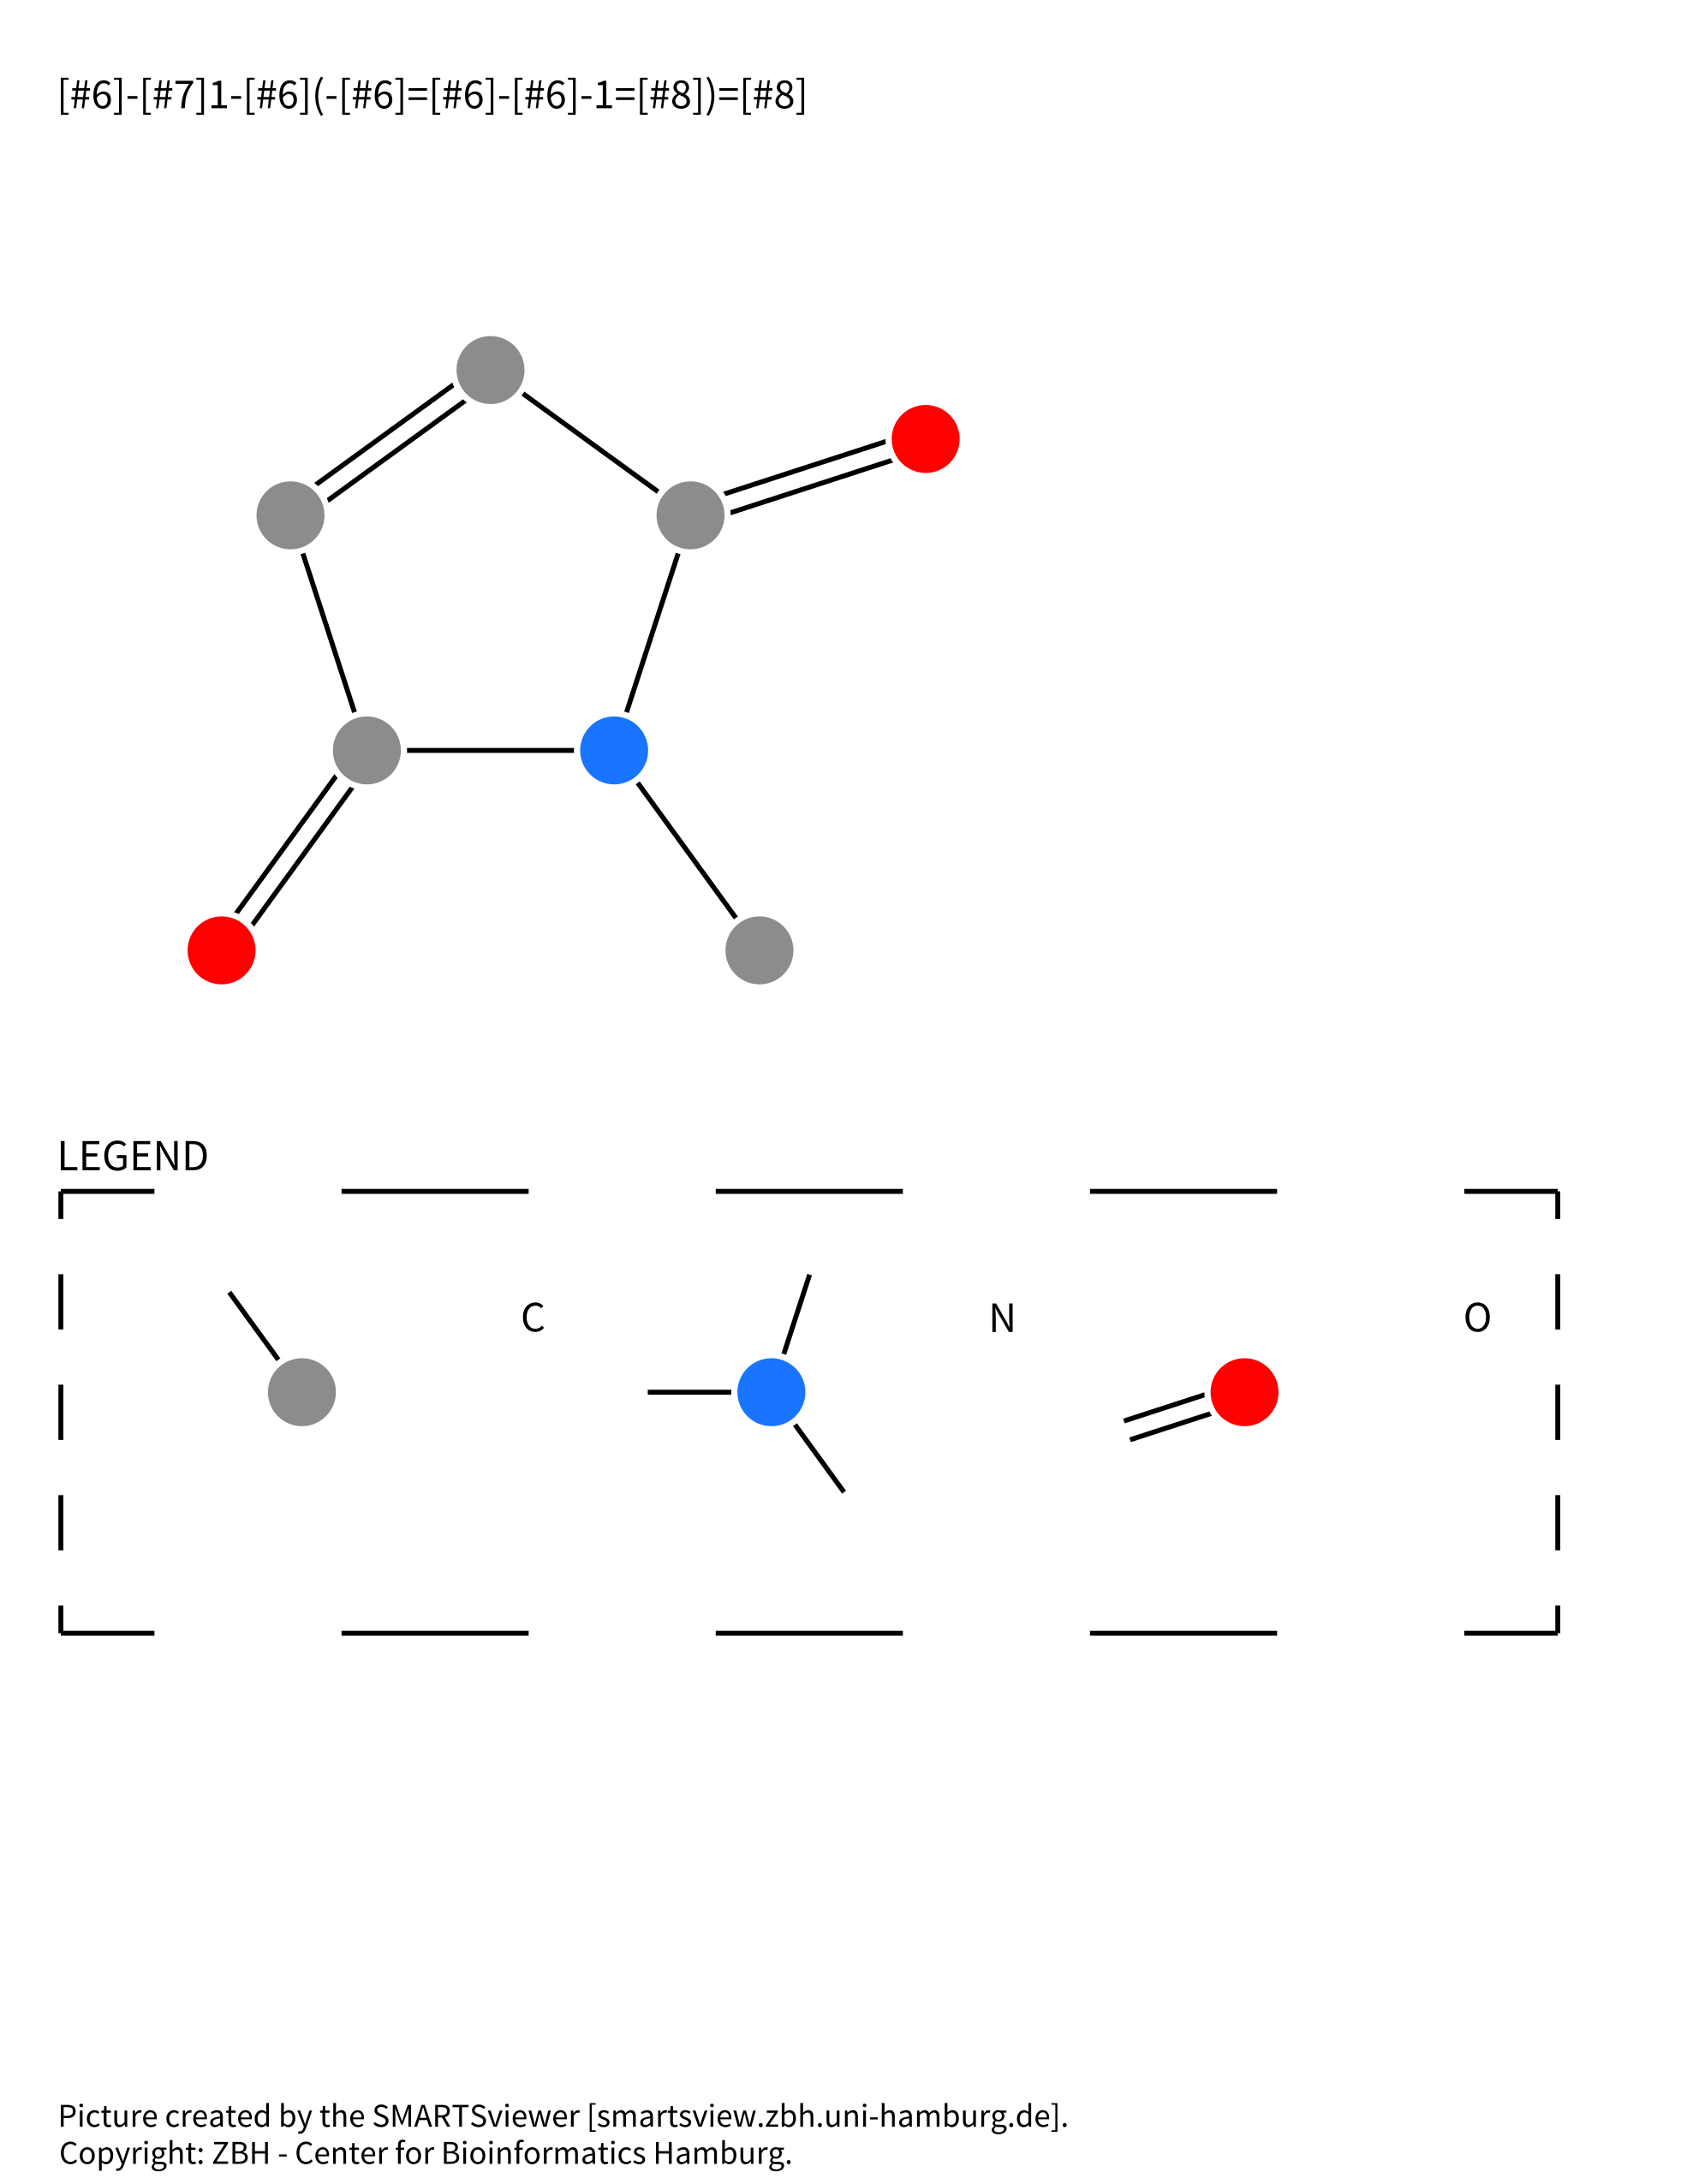

In [24]:
# Visualize your SMILES Strings

molecule = cheminformatics.visualize_smarts(
'[#6]-[#7]1-[#6](-[#6]=[#6]-[#6]-1=[#8])=[#8]'
)

molecule

In [27]:
# Deep Layer your Network

gc = GlobalChem()
gc.initiate_deep_layer_network()
gc.add_deep_layer(
    [
        'emerging_perfluoroalkyls',
        'montmorillonite_adsorption',
        'common_monomer_repeating_units',
        'vitamins',
        'schedule_two',
    ]
)
gc.add_deep_layer(
    [
        'common_warheads_covalent_inhibitors',
        'privileged_scaffolds',
        'iupac_blue_book',
        'schedule_four',
        'schedule_one',
    ]
)

gc.print_deep_network()

                                      ┌common_warheads_covalent_inhibitors
                                      ├privileged_scaffolds
            ┌emerging_perfluoroalkyls─├iupac_blue_book
            │                         ├schedule_four
            │                         └schedule_one
            │                           ┌common_warheads_covalent_inhibitors
            │                           ├privileged_scaffolds
            ├montmorillonite_adsorption─├iupac_blue_book
            │                           ├schedule_four
            │                           └schedule_one
            │                               ┌common_warheads_covalent_inhibitors
            │                               ├privileged_scaffolds
global_chem─├common_monomer_repeating_units─├iupac_blue_book
            │                               ├schedule_four
            │                               └schedule_one
            │         ┌common_warheads_covalent_inhibitors
            │   